In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('../data/Movie_classification.csv')

In [3]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

Missing Value Imputaion

In [5]:
df['Time_taken'].mean()

np.float64(157.3914979757085)

In [6]:
df['Time_taken'].fillna(value=df['Time_taken'].mean(), inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_22100\3318070083.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Time_taken'].fillna(value=df['Time_taken'].mean(), inplace=True)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           506 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

Dummy features Creation

In [8]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


In [9]:
df = pd.get_dummies(df, columns=["3D_available", "Genre"], drop_first=True)

In [10]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,...,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,...,109.60,223.840,23,494,48000,1,True,False,False,True
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,...,146.64,243.456,42,462,43200,0,False,False,True,False
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,...,147.88,2022.400,38,458,69400,1,False,True,False,False
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,...,185.36,225.344,45,472,66800,1,True,False,True,False
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,...,176.48,225.792,55,395,72400,1,False,False,True,False


In [11]:
X = df.loc[:, df.columns != 'Start_Tech_Oscar']
y = df['Start_Tech_Oscar']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42);

Building Classification Tree

In [12]:
from sklearn import tree

clstree = tree.DecisionTreeClassifier(max_depth=5)
clstree.fit(X_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


Predict Values

In [13]:
y_train_pred = clstree.predict(X_train)
y_test_pred = clstree.predict(X_test)

Modell Performance

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Training Set Evaluation:")
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))
print("Accuracy:", accuracy_score(y_train, y_train_pred))

print("\nTest Set Evaluation:")
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))
print("Accuracy:", accuracy_score(y_test, y_test_pred))

Training Set Evaluation:
[[162  26]
 [ 90 126]]
              precision    recall  f1-score   support

           0       0.64      0.86      0.74       188
           1       0.83      0.58      0.68       216

    accuracy                           0.71       404
   macro avg       0.74      0.72      0.71       404
weighted avg       0.74      0.71      0.71       404

Accuracy: 0.7128712871287128

Test Set Evaluation:
[[28 14]
 [36 24]]
              precision    recall  f1-score   support

           0       0.44      0.67      0.53        42
           1       0.63      0.40      0.49        60

    accuracy                           0.51       102
   macro avg       0.53      0.53      0.51       102
weighted avg       0.55      0.51      0.51       102

Accuracy: 0.5098039215686274


Random Forest Classifier

In [15]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [16]:
confusion_matrix(y_test, rf_clf.predict(X_test))

array([[23, 19],
       [16, 44]])

In [17]:
accuracy_score(y_test, rf_clf.predict(X_test))

0.6568627450980392

Grid Search

In [18]:
from sklearn.model_selection import GridSearchCV

rf_clf = RandomForestClassifier(random_state=42)

params_grid = {"n_estimators": [50, 100, 200],
               "max_depth": [None, 10, 20, 30],
               "min_samples_split": [2, 5, 10]
               }

grid_search = GridSearchCV(estimator=rf_clf, param_grid=params_grid,
                           cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

# Evaluation the best model

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

print(f"\n Classification Report:\n {classification_report(y_test, y_pred)}")
print(f"Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits

 Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.60      0.60        42
           1       0.72      0.73      0.73        60

    accuracy                           0.68       102
   macro avg       0.67      0.66      0.66       102
weighted avg       0.68      0.68      0.68       102

Confusion Matrix:
 [[25 17]
 [16 44]]
Accuracy: 0.6764705882352942


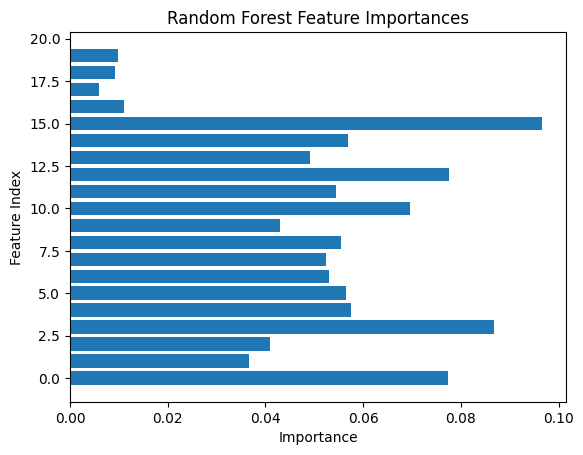

In [19]:
# Feature Importance Visualization

import matplotlib.pyplot as plt

importances = best_rf.feature_importances_
plt.barh(range(len(importances)), importances)
plt.xlabel('Importance')
plt.ylabel('Feature Index')
plt.title('Random Forest Feature Importances')
plt.savefig('../artifacts/figures/rf_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

## Gradient Boosting Algorithm

In [22]:
from xgboost import XGBClassifier

# Initialize XGBoost classifier
xgb_clf = XGBClassifier(random_state=42, eval_metric='mlogloss')

# Define parameter grid for XGBoost
xgb_params_grid = {
    "n_estimators": [100, 200, 500],
    "max_depth": [3, 5, 10, 20],
    "learning_rate": [0.01, 0.1, 0.3],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0],
    "min_samples_split": [2, 5]
}

# Perform Grid Search
xgb_grid_search = GridSearchCV(estimator=xgb_clf, param_grid=xgb_params_grid,
                                cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

xgb_grid_search.fit(X_train, y_train)

# Get the best model
best_xgb = xgb_grid_search.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)

# Evaluation
print(f"\nBest Parameters: {xgb_grid_search.best_params_}")
print(f"\nClassification Report:\n{classification_report(y_test, y_pred_xgb)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_xgb)}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb)}")

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


C:\Users\Asus\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:199: UserWarning: [11:06:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.3, 'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 1.0}

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.57      0.59        42
           1       0.71      0.75      0.73        60

    accuracy                           0.68       102
   macro avg       0.66      0.66      0.66       102
weighted avg       0.67      0.68      0.67       102

Confusion Matrix:
[[24 18]
 [15 45]]
Accuracy: 0.6764705882352942


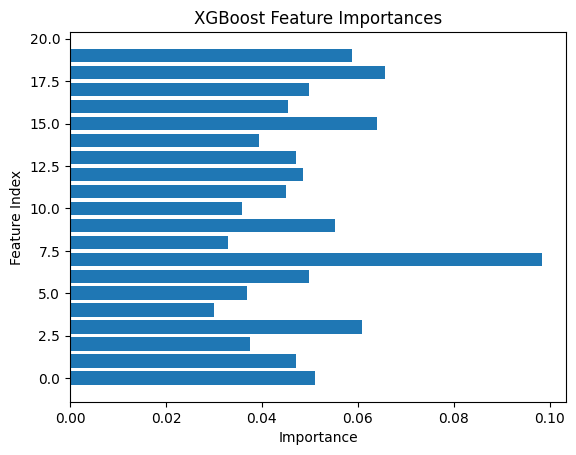

In [23]:
# XGBoost Feature Importance Visualization

importances = best_xgb.feature_importances_
plt.barh(range(len(importances)), importances)
plt.xlabel('Importance')
plt.ylabel('Feature Index')
plt.title('XGBoost Feature Importances')
plt.savefig('../artifacts/figures/xgb_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()